In [2]:
from IPython.display import Image,display
import numpy as np
import math
import healpy as hp
from astropy.table import Table
from astropy.coordinates import Angle
from astropy import units as u

## Shear

Dodelson, sect 10.2

Use Born approximation: light rays are not deflected as they pass through space

$$ \kappa(\theta) = \int{d\chi \delta(\chi, \vec{\theta})} $$

$$\psi_{i,j} = \int_0^{\chi=\infty}{d\chi W(\chi) } \int_0^{\chi}{d\chi \Phi \frac{\chi^\prime(1-\chi^ \prime)}{\chi^\prime}  }$$

where $\Phi_{1,1} + \Phi_{2,2} = \nabla^2 \Phi$

$$\kappa(\phi)= \frac{\psi_{1,1} - \psi_{2,2}}{2} $$

## Fabbian et al
In weak lensing formalism, the effect of
deflections of light rays along the entire line of sight is described by the lens equation,
which maps the final position $(t, \boldsymbol\beta, \chi)$ of the
ray to the position of its source $\boldsymbol\theta$, i.e.
$$
\beta_i (\boldsymbol\theta, \chi) = \theta_i -
\frac{2}{c^2}\int_0^{\chi}\frac{f_K(\chi -
  \chi')}{f_K(\chi)f_K(\chi')}
\Psi,_{\beta_i}\left(\boldsymbol\beta(\boldsymbol\theta,
\chi'), \chi' \right) {\rm d}\chi', 
\label{eq:lenseq}
$$
where $\Psi(t, \boldsymbol\beta, \chi)$ is a gravitational potential located on the photon path and $,_{\beta_i}$ its spatial derivative with respect to the photon's position $\boldsymbol\beta$.
Here $f_K(\chi)$ is the
standard angular diameter distance for a universe with curvature $K$.
The relative position of nearby light rays is quantified by the
derivative of the equation above
$$ A_{ij}(\boldsymbol\theta,\chi) \equiv \frac{\partial \beta_i(\boldsymbol\theta,\chi)}{\partial \theta_j}  $$
  
$$ =  \delta^K_{ij} - \frac{2}{c^2}\int_0^{\chi}\frac{f_K(\chi -
  \chi')}{f_K(\chi)f_K(\chi')}
\Psi,_{\beta_i\beta_k}\left(\boldsymbol\beta(\boldsymbol\theta,
\chi'), \chi' \right) A_{kj}(\boldsymbol\theta,\chi'){\rm d}\chi',
$$
where $\delta^K_{ij}$ is the Kronecker delta. 
The image distortions of light sources are described by the
magnification matrix\footnote{We will refer to the {\bf A} matrix as magnification matrix,  lensing jacobian or distortion tensor as synonyms in the following.} ${\bf A}(\boldsymbol\theta,\chi) \equiv
\left \{ A_{ij}(\boldsymbol\theta,\chi) \right \}$, which 
holds the information of the mapping induced
by lensing between the original image and the one at the current position on the lens plane. Note that the gravitational potential $\Psi$ is evaluated at the ray angular
position $\boldsymbol\beta(\boldsymbol\theta,\chi)$, while the
distortion itself - which is present at the r.h.s of
Eq.~\eqref{eq:distortionmatrix} and describes the {\it lens-lens coupling} - is computed at the
``background'' position $\boldsymbol\theta$.
The magnification matrix ${\bf A}$ is typically decomposed into four fields describing how the
light rays coming from a source at $\chi\equiv \chi_s$ are transformed by the passage through the matter distribution,
$$
A_{ij} \equiv \begin{pmatrix}
  \cos\omega & \sin\omega\\
  -\sin\omega& \cos\omega
\end{pmatrix} \begin{pmatrix}
  1 - \kappa -\gamma_1 & -\gamma_2 \\
  -\gamma_2 & 1-\kappa+\gamma_1
\end{pmatrix} \approx
\begin{pmatrix}
  1 - \kappa -\gamma_1 & -\gamma_2 + \omega \\
  -\gamma_2 - \omega & 1-\kappa+\gamma_1
\end{pmatrix},
$$
where we assumed that the image rotation angle $\omega(\boldsymbol\theta,\chi_s)$ which defines the
rotation of the lensed image, is small, and we can work in the weak lensing regime. The
field $\kappa(\boldsymbol\theta,\chi_s)$ is referred to as the convergence while
$\gamma(\boldsymbol\theta,\chi_s) = \gamma_1(\boldsymbol\theta,\chi_s)
+ i\gamma_2(\boldsymbol\theta,\chi_s)$ defines the complex shear,
describing the shearing of the image along the two orthogonal directions of the basis, and can be decomposed into a
curl-free part, the shear E-modes $\gamma_{\epsilon}(\boldsymbol\theta,\chi_s)$ and a
divergence-free one, the shear B-modes $\gamma_{\beta}(\boldsymbol\theta,\chi_s)$.

$$
\boldsymbol\beta (\boldsymbol\theta, \chi_{s}) = \boldsymbol\theta - \nabla \psi - \nabla \times \Omega, 
\label{eq:hs03}
$$
where we defined the two-dimensional curl $(\nabla \times \Omega)_i =
\epsilon_{ij}\partial \Omega$ and dropped the spatial dependence of the potentials for sake of clarity. This potential $\Omega^{\rm eff}$ has to be
intended as an 'effective' Born-like potential, integrated along the line of sight, that encodes all the information about the rotation of the image as curl-like patterns are originated in the signal through
multiple deflections. All the quantities above can be
treated on the sphere using the spin-$s$
spherical harmonic decomposition of the full-sky \cite{Hu2000,Becker12}. In
addition, combining results from \cite{Hu2000} and
\cite{Stebbins1996}, we can derive consistency relations between the components of the magnification matrix and the effective potentials (see Appendix~\ref{sec:appendix} for further details). 

\subsection{Multiple-lens-plane approach}
\label{sec:theory:multiple}
Following \cite{DasBode,Calabrese14}  we note that the Eqs.~\eqref{eq:lenseq},\eqref{eq:distortionmatrix} can be discretized by dividing
the interval between the observer and the source
into concentric $N$ spherical shells, each of comoving thickness $\Delta \chi$,
denoted by $\chi_k$ as the comoving distance to the middle of the
$k$-th shell and its related redshift $z_k$. 
A photon incoming on the $k$-th
shell at $\chi_k$ is deflected due to the presence of matter by an
angle $\boldsymbol\alpha^{(k)}$, which can be approximated by
$$
\boldsymbol\alpha^{(k)} = \frac{2}{c^2f_K(\chi_k)} \int^{\chi_k+\Delta \chi /2}
_{\chi_k-\Delta \chi /2} \nabla_{\beta} \Psi(\boldsymbol\beta(\boldsymbol\theta,\tilde{\chi}),\tilde{\chi})d
\tilde{\chi} = \nabla_{\beta} \Phi^{(k)}(\boldsymbol\beta(\boldsymbol\theta,\chi_k),\chi_k),
$$
where we have defined the 2-D gravitational potential on the sphere as
$$
\Phi^{(k)}(\boldsymbol\beta(\boldsymbol\theta,\chi_k),\chi_k) = \frac{2}{c^2f_K(\chi_k)} \int^{\chi_k+\Delta \chi /2}
_{\chi_k-\Delta \chi /2} \Psi(\boldsymbol\beta(\boldsymbol\theta,\tilde{\chi}),\tilde{\chi})d
\tilde{\chi}.
$$
Here, the notation $(\boldsymbol\beta(\boldsymbol\theta,\chi_k),\chi_k)$ means that the potential is
evaluated at the conformal look-back time $\chi_k$, when the
photon, coming from a source at distance $\chi_s$ from the observer at
position $\boldsymbol\theta$ on the celestial sphere, was at the position $\boldsymbol\beta^{(k)}$. 
The second derivatives can be combined into the
shear matrix ${\bf U}$:
$$
U^{(k)}_{ij} = \frac{\partial^2 \Psi^{(k)}(\boldsymbol\beta^{(k)}) }{\partial \beta^{(k)}_i
  \partial \beta^{(k)}_j} = \frac{\partial \alpha^{(k)}_i(\boldsymbol\beta^{(k)})}{\partial \beta^{(k)}_j},
$$
being $\boldsymbol\alpha^{(k)}$ the lensing angle for the $k$-th shell. In case of the full-sky analysis the partial derivative operators have to be promoted to covariant derivatives \cite{Becker12}. 
The lensing potential for each matter shell $k$ is the solution of the Poisson equation, i.e.
$$ \nabla^2_{\hat{n}} \Phi^{(k)}(\boldsymbol\beta^{(k)}) = 2 K^{(k)}(\boldsymbol\beta^{(k)}) $$
where the convergence field $K^{(k)}$ at the $k$-th shell is
$$ K^{(k)}(\boldsymbol\beta^{(k)}) = \frac{4 \pi  G}{c^2}\frac{D_A(\chi_k)}{(1+z_k)^2}\Delta^{(k)}_{\Sigma}(\boldsymbol\beta^{(k)})$$
and $\Delta^{(k)}_{\Sigma}(\hat{n})$ is the (projected)
surface mass overdensity, as in \cite{DasBode,Calabrese14}.
In Eq.££ we dropped the term containing the
derivatives in the radial direction, ignoring thus 
long wavelength fluctuations along the line-of-sight via
the Limber approximation \cite{Jain00,Becker12}. As noted in \cite{Calabrese14}, the results of this approximation are particularly evident if we look at the angular power spectrum for the lensing potential of each single matter shell. However, if we look at the overall effect after a sufficiently long photon path, the partial derivatives in the transverse plane
commute with the integral evaluated along the whole line of sight, resulting in the cancellation of
line-of-sight modes as required in the Limber approximation of the
integral \cite{DasBode,Li2010,Becker12,Calabrese14}. The lensing potential on the sphere is related to $K^{(k)}$ via Eq.££, and
it can be easily computed by expanding both sides of the Poisson
equation in spherical harmonics. The quantity $K^{(k)}$ is directly computed when the matter distribution in
the shell is radially projected onto the spherical map, as explained in Sec. ££
 


Given the deflection angle at each lens-plane, we can trace back the
light coming from a source at position $(\boldsymbol\theta,\chi_s)$ to the observer
after $N$ deflections:
$$
\boldsymbol\beta(\boldsymbol\theta,\chi_s) = \boldsymbol\theta -
\sum_{i=0}^{N-1}\frac{f_K(\chi_s -
  \chi_k)}{f_K(\chi_s)}\boldsymbol\alpha^{(k)}(\boldsymbol\beta^{(k)}).
\label{eq:fulllenseq_dis}
$$
We can easily discretize the Eq.££ as
$$
A^{N}_{ij}(\boldsymbol\theta, \chi_N) = \delta^K_{ij} - \sum^{N-1}_{k=0} \frac{D_{k,N}}{D_N}
U^{(k)}_{ip}(\boldsymbol\beta^{(k)},\chi_k)
A^{(k)}_{pj}(\boldsymbol\theta,\chi_k),
\label{eq:distortionmatrix_dis}
$$
where we defined for simplicity $D_{k,N} = f_K(\chi_N - \chi_k)$, 
$D_k = f_K(\chi_k)$ while $N$ is the number of planes necessary to reach
the source at comoving distance $\chi_N$.  

The method in Eq.££ becomes computationally unfeasible very quickly, especially when we have a large number of lens planes covering a wide sky fraction. It, in fact, requires that for each $k\textrm{-th}$ iteration all the information of the $k-1$ deflections is kept. This becomes particularly problematic in the case of CMB where the source plane is located at very high redshift and at least 50 (or more) iterations are required to model the path of CMB photons. 
\cite{ValeWhite03,Hilbert09} proposed  a more efficient method 
that requires the combination of only two previous lens-planes
instead of the whole set as Eq. ££. The method has been validated on the full-sky in \cite{Becker12}. The
angular position $\boldsymbol\beta^{(k)}$ at the $k$-th shell is a
function of its two previous positions $\boldsymbol\beta^{(k-2)}$ and
$\boldsymbol\beta^{(k-1)}$ as 
$$
\boldsymbol\beta^{(k)}  = \left(1 -
\frac{D_{k-1}}{D_k}\frac{D_{k-2,k}}{D_{k-2,k-1}}\right) \boldsymbol\beta^{(k-2)}
 + \frac{D_{k-1}}{D_k}\frac{D_{k-2,k}}{D_{k-2,k-1}} \boldsymbol\beta^{(k-1)} 
 - \frac{D_{k-1,k}}{D_k} \boldsymbol\alpha^{(k-1)} (\boldsymbol\beta^{(k-1)}),
\label{eq:hilbert-beta}
$$
and, by differentiating with respect to $\boldsymbol\theta$ as in Eq ££, we obtain
the recurrence relation for the magnification matrix
\cite{Hilbert09,Becker12} as well:
$$
A^{(k)}_{ij} = \left( 1 -
\frac{D_{k-1}}{D_k}\frac{D_{k-2,k}}{D_{k-2,k-1}}\right) A^{(k-2)}_{ij} 
 + \frac{D_{k-1}}{D_k}\frac{D_{k-2,k}}{D_{k-2,k-1}} A^{(k-1)}_{ij}
 - \frac{D_{k-1,k}}{D_k} U^{(k-1)}_{ip} A^{(k-1)}_{pj}.\\
\label{eq:hilbert-a}
$$
These relations require fewer arithmetic operations and memory usage
than the standard discretization of Eq ££, therefore allowing us to compute
iteratively the magnification matrix for each light-rays from the
observer to any source. 
In the following we will also make use of the so-called magnification matrix in the first
order approximation \cite{Hilbert09} to assess the impact of the second-order effects and to distinguish those from numerical effects. In the multiple-lens formalism this takes the form 
$$
\label{eq:first_order_aij}
A^{(N), {\rm 1st}}_{ij}(\boldsymbol\theta, \chi_s) = \delta^K_{ij} - \sum^{N-1}_{k=0}
\frac{D_{k,N}}{D_N} U^{(k)}_{ij}(\boldsymbol\theta,\chi_k).
$$


## Raytracing
 Starting from
the convergence harmonic coefficients $K^{(k)}_{\ell m}$ it extracts the lensing potential of each shell solving the Poisson equation in the harmonic domain  as $\psi^{(k)}_{\ell m}=-2K^{(k)}_{\ell m}/[\ell(\ell+1)]$. It then computes the deflection field for each lensing plane $\boldsymbol\alpha^{(k)}$ assuming the deflection field
as a purely gradient field (i.e. a spin-1 curl-free vector field) having E and B decomposition
$$_{1}\alpha^{E}_{\ell m}{}^{(k)}=\sqrt{\ell(\ell+1)}\psi^{(k)}_{\ell m} \qquad _{1}\alpha^{B}_{\ell m}{}^{(k)}=0 $$


# Algorithm

## Build lightcone

Construct matter lightcone from Gadget simulation snapshots

Done already.

## Generate density maps
For each lens plane (initially use lightcone snapshot shell per lensplane -> 20 lensplanes up to $z=0.85$)
map particle count onto full sky map using *healpix*, to obtain the (projected) surface mass overdensity  $\Delta^{(k)}_{
\Sigma^{\theta}}({\bf \hat{n}}) =  \Sigma^{\theta}({\bf \hat{n}}) - \langle \Sigma^{\theta}
\rangle$.

(Fabbian 2018 used maps having an angular resolution of 52 arcsec corresponding to a NSIDE parameter 4096.)

## Calculate convergence maps
The lensing potential for each matter shell $k$ is the solution of the Poisson equation, i.e.
$$ \nabla^2_{\hat{n}} \Phi^{(k)}(\boldsymbol\beta^{(k)}) = 2 K^{(k)}(\boldsymbol\beta^{(k)}) $$
where the convergence field $K^{(k)}$ at the $k$-th shell is
$$ K^{(k)}(\boldsymbol\beta^{(k)}) = \frac{4 \pi  G}{c^2}\frac{D_A(\chi_k)}{(1+z_k)^2}\Delta^{(k)}_{\Sigma}(\boldsymbol\beta^{(k)})$$

Calculate harmonic coefficients of convergence field $K^{(k)}_{\ell m}$ by solving the Poisson equation in the harmonic domain as $\psi^{(k)}_{\ell m}=-2K^{(k)}_{\ell m}/[\ell(\ell+1)]$, using intitally the *map2alm* function in healpix, but possibly subseqently using the parallel SPH routines in *S2HAT*.

- convert surface mass overdensity map to $K_{\ell m}$ using healpix map2alm
- divide $K_{\ell m}$ by ${-\ell(\ell+1)}$ to calculate $\psi_{\ell m}$
- use alm2map_der1 to generate $\psi$ map as well as first and second derivatives of $\psi$ with respect to $\theta_i$ and $\theta_j$ to construct magnification matrix $\cal{A}(\boldsymbol{\vec\theta})$

using
$\cal{A}(\boldsymbol{\vec\theta})=\left(\delta_{ij}-\dfrac{\partial^2 \psi(\boldsymbol{\vec\theta)}}{\partial\theta_i \partial\theta_j} \right)$

$$\rightarrow \cal{A}(\boldsymbol{\vec\theta})=\left( 
\begin{array}{cc}
 1 - \psi_{,11}  & \psi_{,12} \\
      \psi_{,21} & 1 - \psi_{,22}     
\end{array}
\right)$$


## Perform raytracing

Propagate magnification matrix  $\cal{A}(\boldsymbol{\vec\theta})$ for each pixel ('ray') through all lens planes:
$$
A^{N}_{ij}(\boldsymbol\theta, \chi_{s}) = \delta^{K}_{ij} - \sum^{N-1}_{k=0}
\frac{\chi_{N} - \chi_{k}}{\chi_{k}} U^{(k)}_{ij}(\boldsymbol\theta,\chi_{k})
$$

where $U^{(k)}_{ij}$ is the shear matrix, defined as
$$
\textbf{U}^{(k)}_{ij}=\frac{\partial^2\psi^{(k)}(\vec{\beta}^{(k)})}{\partial \beta^{(k)}_i\partial \beta^{(k)}_j} = \frac{\partial\alpha^{(k)}_i(\vec{\beta}^{(k)})}{\partial \beta^{(k)}_j}.
$$

Rather than summing up over all preceeding lens planes, we can use only the two preceeding planes to calculate the magnification matrix for the current plane
$$ A^{(k)}_{ij} = \left( 1 - \frac{\chi_{k-1}}{\chi_k} \frac{(\chi_{k} - \chi_{k-2})}{(\chi_{k-1}- \chi_{k-2})} \right) A^{(k-2)}_{ij} 
+ \frac{\chi_{k}}{\chi_{k-1}}\frac{(\chi_{k}-\chi_{k-2})}{(\chi_{k-1} - \chi_{k-2})} A^{(k-1)}_{ij}
- \frac{(\chi_{k} - \chi_{k-1})}{\chi_{k}} U^{(k-1)}_{ip} A^{(k-1)}_{pj} $$


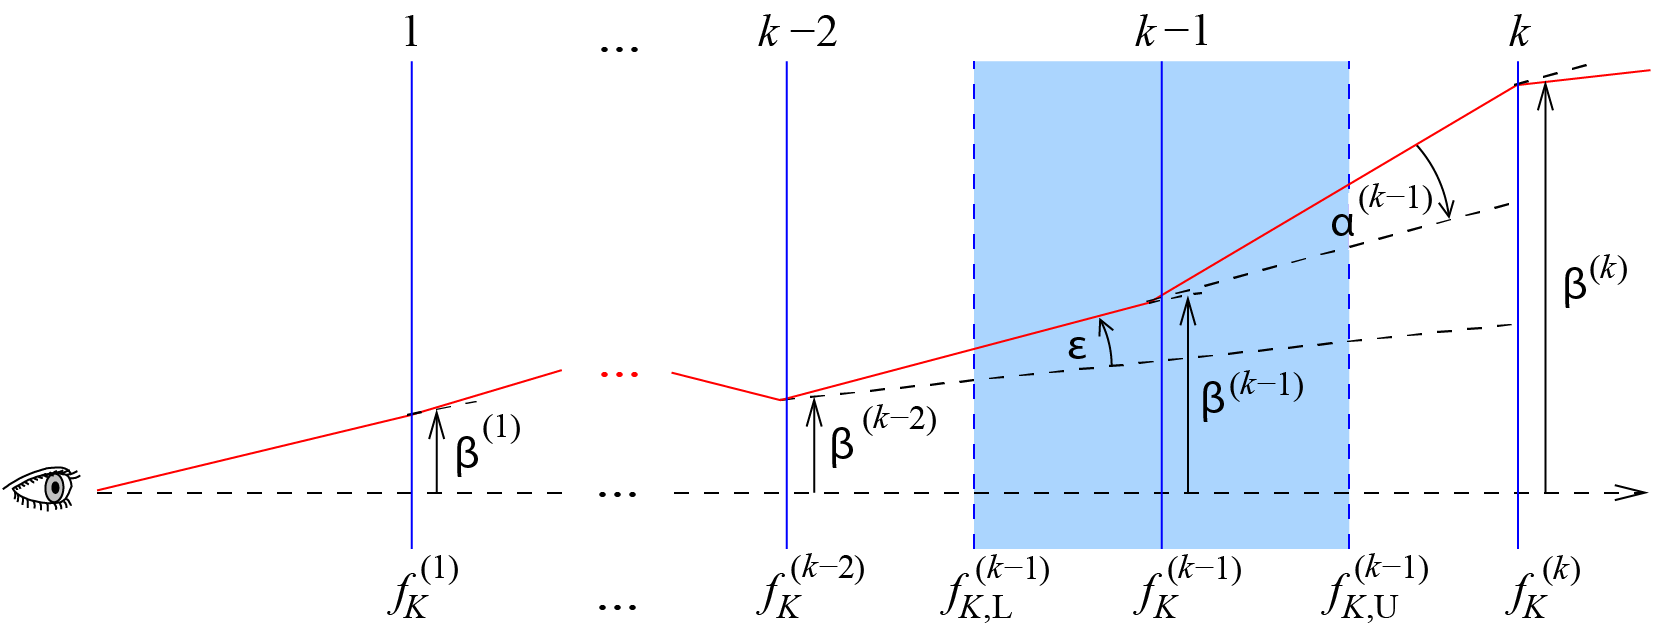

In [5]:
Image(filename='light_cone.png')

## Calculate convergence and shear maps

$\cal{A}(\boldsymbol{\vec\theta})= \left( \begin{array}{cc}
 1 - \kappa - \gamma_1     & -\gamma_2 \\
   -\gamma_2       & 1-\kappa+\gamma_1     
\end{array}\right)$

$\gamma_1 = \frac{1}{2}(\psi_{,11} - \psi_{,22}) = \frac{1}{2}(\cal{A}_{11} -\cal{A}_{22})$

$\gamma_2 = \psi_{,12}= \psi_{,21}  = \cal{A}_{12}   = \cal{A}_{21}$

$\gamma \equiv \gamma_1 + i\gamma_2 = |\gamma| e^{2i\psi} $

$\displaystyle \kappa ({\vec {\theta }})= \frac{1}{2}\left(\psi_{,11} + \psi_{,22} \right) = \frac{1}{2}(\cal{A}_{11} +\cal{A}_{22})$

## Alernative methodology
(cf. Kilbinger 2016)
$$
  \left\langle \gamma_{\rm t} \right\rangle (\theta)
  =  \bar \kappa (\le \theta) - \left\langle \kappa \right \rangle (\theta) 
$$

We can express $\langle \gamma_{\rm t} \rangle$ in terms of a *surface
mass excess* as follows. In the case of a single lens localised at angular
diameter distance $D_{\rm l}$, we can approximate eqn ££ with
$$
  \kappa(\vec \theta) = \frac{4 \pi G}{c^2} \frac{D_{\rm l} D_{\rm ls}}{D_{\rm s}} \int\limits_{D_{\rm l} - \Delta D/2}^{D_{\rm l} + \Delta D/2}
  {\rm d} D \, \Delta \rho(D \vec \theta, D),
$$

where $D_{\rm s}$ is the distance to the source, and $D_{\rm ls}$ the distance
between lens and source. All distances in this and subsequent equations are proper distance.
The integral over the lens mass density contrast
$\Delta \rho = \rho - \bar \rho = \bar \rho \delta$ is carried out along the physical
extent of the mass
concentration $\Delta D$. This integral is defined as *surface mass density* $\Sigma$.
Introducing the critical surface mass density $\Sigma_{\rm cr}^{-1} = (4\pi G/c^2) (D_{\rm l}D_{\rm ls}/D_{\rm s})$,
the convergence is simply
$$   \kappa(\vec \theta) = \frac {\Sigma(\vec \theta)} {\Sigma_{\rm cr}} $$

Then, eqn ££ can be written in terms of the surface mass as
$$ 
  \left \langle \gamma_{\rm t} \right\rangle (\theta) \, \Sigma_{\rm cr} = \Delta \Sigma(\le \theta) = \bar \Sigma(\theta) -
  \left \langle \Sigma \right \rangle (\theta) 
$$

where $\displaystyle \Sigma_{crit}^{-1}= \frac{4 \pi G}{c^2}\frac{\chi_{d}(\chi_{s}-\chi_{d})}{\chi_s}$

$$
 \kappa (\vec{\theta}, \chi)= \frac{4 \pi G}{c^2}\frac{1}{\chi_{s}}\!\sum_{i} (1 + z^{(i)}) \frac{(\chi_{s}-\chi_{d}^{(i)})}{\chi_d^{(i)}}\left[\Sigma^{(i)}(\vec{\theta})\!-\!\bar{\Sigma}^{(i)}\right]
$$
where $\Sigma^{(i)}$ denotes the angular surface mass density, $\bar{\Sigma}^{(i)}$ is the mean angular surface mass density of the $i$-th shell, and $f_{DS}^{(i)}$ and $f_D^{(i)}$ are the corresponding distances at the redshift of the $i$-th shell. The angular position of the center of each \healpix{} pixel coincides with the direction of propagation of the rays in the Born approximation.


# Memory requirements

In [19]:
b = 24 #64 # bytes of storage per ray
nplanes = 20 #number of lensplanes
res = np.arange(16)
nside = np.int64(2**res)
npix = np.int64(12 * nside**2)
deg = hp.nside2resol(nside, arcmin = True)
mapsize = (npix * b) /2**30
tab = Table([res, nside, npix, deg, mapsize], names=('res', 'nside', 'npix', 'angle (arcmin)','Gbytes/plane'))

In [20]:
tab

res,nside,npix,angle (arcmin),Gbytes/plane
int64,int64,int64,float64,float64
0,1,12,3517.9380857010237,2.682209014892578e-07
1,2,48,1758.9690428505119,1.0728836059570312e-06
2,4,192,879.4845214252559,4.291534423828125e-06
3,8,768,439.74226071262797,1.71661376953125e-05
4,16,3072,219.87113035631398,6.866455078125e-05
5,32,12288,109.93556517815699,0.000274658203125
6,64,49152,54.967782589078496,0.0010986328125
7,128,196608,27.483891294539248,0.00439453125
8,256,786432,13.741945647269624,0.017578125


In [18]:
nside * deg

array([3517.9380857, 3517.9380857, 3517.9380857, 3517.9380857,
       3517.9380857, 3517.9380857, 3517.9380857, 3517.9380857,
       3517.9380857, 3517.9380857, 3517.9380857, 3517.9380857,
       3517.9380857, 3517.9380857, 3517.9380857, 3517.9380857])